In [2]:
"""test_holography: Run holographic calibration tests."""
import pylab as plt
import pytest
from aa_uv.io import hdf5_to_uvx
from aa_uv.postx import ApertureArray
from aa_uv.utils import get_test_data

FN_RAW   = get_test_data('aavs2_1x1000ms/correlation_burst_204_20230823_21356_0.hdf5')


def test_holography_errs():
    """Test that errors are raised."""
    uvx = hdf5_to_uvx(FN_RAW, telescope_name='aavs2')
    aa = ApertureArray(uvx)

    with pytest.raises(RuntimeError):
        aa.calibration.holography.plot_aperture()

    with pytest.raises(RuntimeError):
        aa.calibration.holography.plot_aperture_xy()

    with pytest.raises(RuntimeError):
        aa.calibration.holography.plot_farfield_beam_pattern()

    with pytest.raises(RuntimeError):
        aa.calibration.holography.plot_phasecal_iterations()

test_holography_errs()

2024-07-11 13:39:55.413 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:39 - Using internal config aavs2
/Users/daniel.price/Data/aavs_uv/src/aa_uv/datamodel/uvx.py:184: FutureWarning: Setting the location attribute post initialization will be disallowed in a future version of Astropy. Instead you should set the location when creating the Time object. In the future, this will raise an AttributeError.
  t.location = eloc
2024-07-11 13:39:55.468 | INFO     | aa_uv.datamodel.uvx:create_visibility_array:211 - Conjugating data
2024-07-11 13:39:55.471 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:183 - Could not find expected keys in observation_info
2024-07-11 13:39:55.471 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:185 - <KeysViewHDF5 []>
2024-07-11 13:39:55.685 | ERROR    | aa_uv.postx.calibration.holography:__check_holo_dict_set:655 - Self-holography not run yet! Run run_selfholo() first.
2024-07-11 13:39:55.686 | ERROR    | aa_uv.postx.calibration.holography:__check_holo_dict_set:655 - S

2024-07-11 13:39:59.626 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:39 - Using internal config aavs2
/Users/daniel.price/Data/aavs_uv/src/aa_uv/datamodel/uvx.py:184: FutureWarning: Setting the location attribute post initialization will be disallowed in a future version of Astropy. Instead you should set the location when creating the Time object. In the future, this will raise an AttributeError.
  t.location = eloc
2024-07-11 13:39:59.669 | INFO     | aa_uv.datamodel.uvx:create_visibility_array:211 - Conjugating data
2024-07-11 13:39:59.671 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:183 - Could not find expected keys in observation_info
2024-07-11 13:39:59.672 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:185 - <KeysViewHDF5 []>
2024-07-11 13:39:59.848 | INFO     | aa_uv.postx.calibration.holography:jishnu_selfholo:222 - Generating vis matrix: data


dict_keys(['beam_corr', 'aperture_img', 'meas_corr', 'lmn_grid', 'vis_matrix', 'aperture_size', 'n_pix', 'oversample_factor'])


/Users/daniel.price/Data/aavs_uv/src/aa_uv/postx/calibration/holography.py:589: RuntimeWarning: invalid value encountered in arccos
  theta = np.rad2deg(np.arccos(holo_dict['lmn_grid'][0,:, 0])) - 90


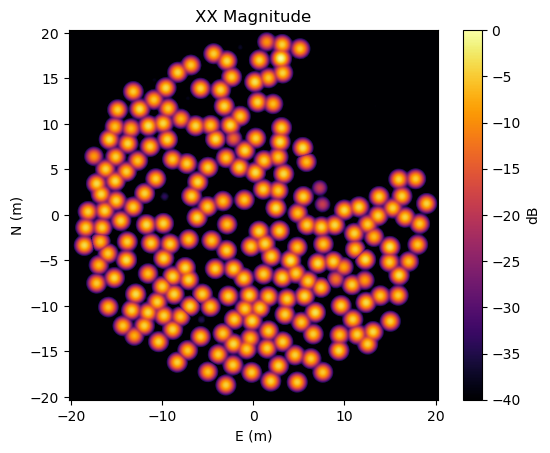

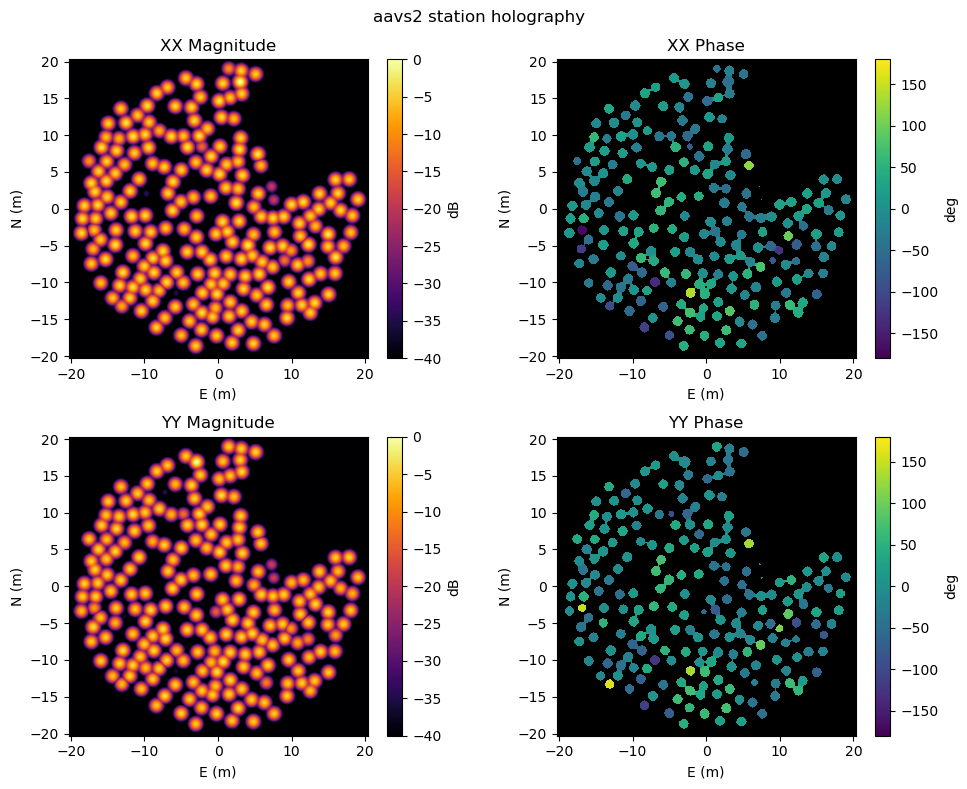

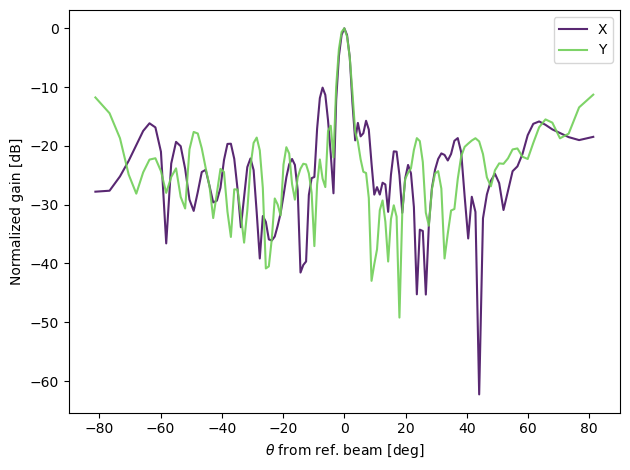

In [3]:
def test_holography_selfholo():
    """Test self-holography function."""
    uvx = hdf5_to_uvx(FN_RAW, telescope_name='aavs2')
    aa = ApertureArray(uvx)

    aa.calibration.holography.set_cal_src(aa.coords.get_sun())
    holo_dict = aa.calibration.holography.run_selfholo()
    print(holo_dict.keys())

    plt.figure()
    aa.calibration.holography.plot_aperture()
    #plt.figure()
    aa.calibration.holography.plot_aperture_xy()
    plt.figure()
    aa.calibration.holography.plot_farfield_beam_pattern()
    plt.show()

test_holography_selfholo()